## Grad Cam
by YSPARK   
tensorflow==2.14.0

## 닮은 꼴의 비애..
<hr>

![레이놀즈1.gif](../static/레이놀즈1.gif)   

레이놀즈: 어젯밤에 누가 저보고 라라랜드 재밌게 봤다고 하더라고요? 정정할 게 있긴 하지만 걍 안 했어요 ㅋㅋ

![고슬링1.gif](../static/고슬링1.gif)   

Q. 누가 길에서 님 영접하고 실신하면 어떡하실 거임?

고슬링: 괜찮아요, 가까이 와서
레이놀즈 아닌 거 알면 걍 갈텐데요, 뭐...

<hr>

## 내가 알아봐줄게!!!!!!

by YSPARK   
tensorflow==2.14.0

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
directory='C:/Users/Administrator/Desktop/XAI/imgs'

# 데이터 증강을 위한 ImageDataGenerator 설정
img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    validation_split=0.3
)

# 훈련 데이터셋 생성
train_ds = img_gen.flow_from_directory(
    directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset="training",
    seed=123
)

# 검증 데이터셋 생성
val_ds = img_gen.flow_from_directory(
    directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset="validation",
    seed=123
)

Found 183 images belonging to 2 classes.


Found 77 images belonging to 2 classes.


In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)


Epoch 1/100


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 6s 767ms/step - loss: 0.7020 - accuracy: 0.5191 - val_loss: 0.6890 - val_accuracy: 0.5584
Epoch 2/100
6/6 [==============================] - 4s 701ms/step - loss: 0.6964 - accuracy: 0.5628 - val_loss: 0.6879 - val_accuracy: 0.5584
Epoch 3/100
6/6 [==============================] - 4s 725ms/step - loss: 0.6850 - accuracy: 0.5628 - val_loss: 0.6866 - val_accuracy: 0.5584
Epoch 4/100
6/6 [==============================] - 4s 733ms/step - loss: 0.6869 - accuracy: 0.5628 - val_loss: 0.6859 - val_accuracy: 0.5584
Epoch 5/100
6/6 [==============================] - 4s 704ms/step - loss: 0.6876 - accuracy: 0.5628 - val_loss: 0.6871 - val_accuracy: 0.5584
Epoch 6/100
6/6 [==============================] - 5s 726ms/step - loss: 0.6781 - accuracy: 0.5628 - val_loss: 0.6857 - val_accuracy: 0.5584
Epoch 7/100
6/6 [==============================] - 4s 713ms/step - loss: 0.6784 - accuracy: 0.5628 - val_loss: 0.6820 - val_accuracy: 0.5584
Epoch 8/100
6/6 [========

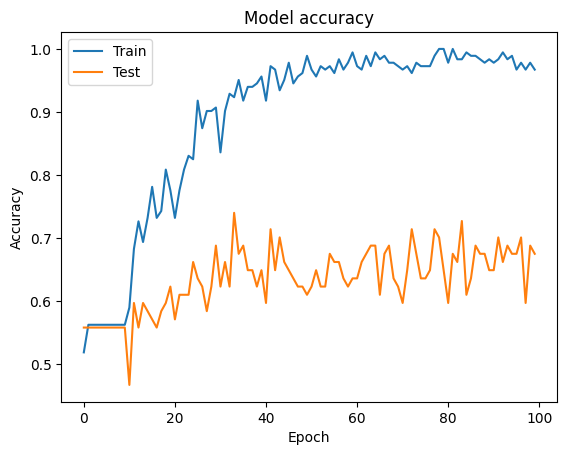

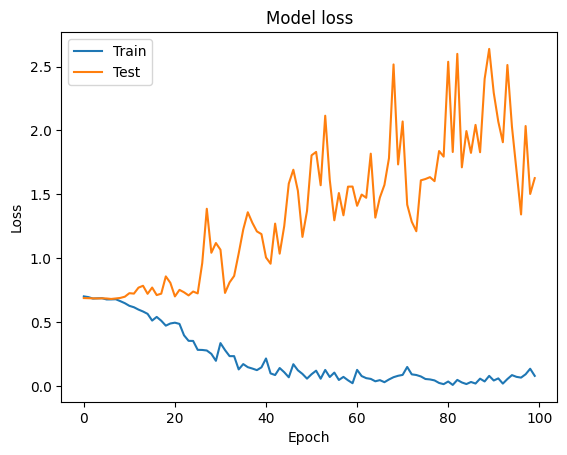

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1024284126631874047
xla_global_id: -1
]


In [11]:
tf.config.list_physical_devices('GPU') 

[]

In [12]:
tf.__version__

'2.14.0'